In [1]:
# Imports
import os, subprocess, json

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go

import dash
import dash_core_components as dcc
import dash_html_components as dhtml
from dash.dependencies import Input, Output




In [2]:
# Set max rows for Pandas
pd.set_option('display.max_rows', 500)

# Set figure dimensions for matplotlib
mpl.rcParams["figure.figsize"]= (16, 9)

# Set seaborn style
sns.set(style="darkgrid")

## CRISP-DM
![CRISP-DM](../reports/figures/CRISP_DM.png)

# Data Understanding- Explorative Data Analysis
- We want to focus on visual representation of data

In [4]:
# Load minimal dataset
sf_plot= pd.read_csv("../data/processed/COVID_flat_small.csv", sep=";")
sf_plot.tail()

,date,Spain,Nigeria,Germany,Afghanistan,Italy
201,2020-08-10,322980,46867,218508,37162,250825
202,2020-08-11,326612,47290,219540,37269,251237
203,2020-08-12,329784,47743,220859,37345,251713
204,2020-08-13,337334,48116,222281,37424,252235
205,2020-08-14,342813,48445,223791,37431,252809


<Figure size 1152x648 with 0 Axes>

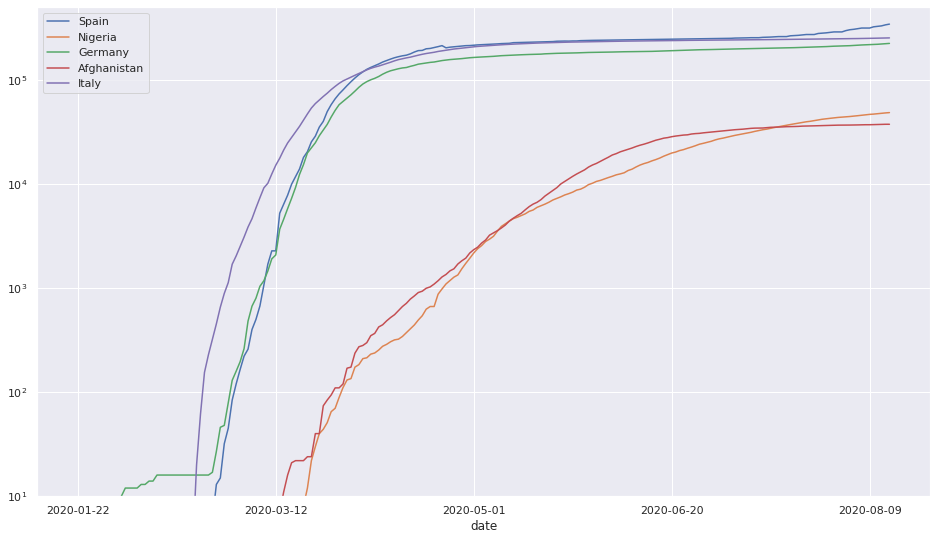

In [6]:
# Plot object
plt.figure()
axis= sf_plot.set_index("date").plot()
# Set limits
plt.ylim(10, 500000)
# Set logarithimic scale on the y-axis
axis.set_yscale("log")

## Dynamic Plots

### Plot.ly

In [12]:
# Create figure
fig= go.Figure()

# Country list
country_list= sf_plot.columns.drop("date")
# Loop through each country and add traces for each
for country in country_list:
    # Add a trace
    fig.add_trace(
        go.Scatter(
            x=sf_plot.date,
            y=sf_plot[country],
            mode="markers+lines",
            opacity=0.8,
            line_width=2,
            marker_size=5,
            name= country
        )
    )

# Set figure layout
fig.update_layout(
    width=900,
    height=600,
    xaxis_title="Time",
    xaxis={
        "tickangle": -75,
        "nticks": 20,
        "tickfont": dict(size=14, color="#7f7f7f")
    },
    yaxis_title="Confirmed cases (source: John Hopkins)",
    yaxis={
        "type": "log",
        "range": [0.1, 6.0]
    }
)

# Introduce range slider for more convenience in adjusting data windpw
fig.update_layout(xaxis_rangeslider_visible=True)


### Dash

In [14]:
# Setup options for dropdown
drp_options= [  {"label": country, "value": country} for country in country_list ]
# Dash app
app= dash.Dash()
#Create layout
app.layout= dhtml.Div([
    dhtml.Label("Multi-Country Select"),
    dcc.Dropdown(
        id="country_dropdown",
        options=drp_options,
        # Selected by default
        value=[country_list[0], country_list[1]],
        # Enable mutiple selections at once
        multi=True
    ),
    dcc.Graph(figure=fig, id="main_div")
])

In [15]:
# Add callback for Dropdown

# Callback wrapper
@app.callback(
    Output("main_div", "figure"),
    [Input("country_dropdown", "value")]
)
# Callback function
def update_fig(selected_countries):

    #Traces
    traces= []
    for country in selected_countries:
        # Add a trace
        traces.append(
            {
                "x": sf_plot.date,
                "y": sf_plot[country],
                "mode":"markers+lines",
                "opacity": 0.8,
                "line_width": 2,
                "marker_size": 5,
                "name": country
            }
        )

    # Layout
    fig_design= dict(
        width=900,
        height=600,
        xaxis_title="Time",
        xaxis={
            "tickangle": -75,
            "nticks": 20,
            "tickfont": dict(size=14, color="#7f7f7f")
        },
        yaxis_title="Confirmed cases (source: John Hopkins)",
        yaxis={
            "type": "log",
            "range": [0.1, 6.0]
        }
    )

    return {
        "data": traces,
        "layout": fig_design
    }

In [16]:
# Run Dash server. (Turn off reloader if inside a Jupyter notebook)
app.run_server(debug=True, use_reloader=False)

Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Debugger PIN: 863-833-465
Debugger PIN: 863-833-465
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
